In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import shap

/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bodmas_dataset_path = '../datasets/bodmas.npz'
bodmas_dataset = np.load(bodmas_dataset_path)

In [3]:
X = bodmas_dataset['X']
y = bodmas_dataset['y']
X.shape, y.shape

((134435, 2381), (134435,))

In [4]:
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0


In [5]:
def build_feature_names():
    num_of_features = 2351
    names = [''] * num_of_features
    base = 0
    
    for i in range(256):
        names[base + i] = 'ByteHistogram' + str(i)
    base = 256
    for i in range(256):
        names[base + i] = 'ByteEntropyHistogram' + str(i)
    base += 256
    names[base + 0] = 'numstrings'
    names[base + 1] = 'avlength'
    
    for i in range(96):
        names[base + 2 + i] = 'printabledist' + str(i)
    names[base + 98] = 'printables'
    names[base + 99] = 'string_entropy'
    names[base + 100] = 'paths_count'
    names[base + 101] = 'urls_count'
    names[base + 102] = 'registry_count'
    names[base + 103] = 'MZ_count'
    base += 104
    names[base + 0] = 'size'
    names[base + 1] = 'vsize'
    names[base + 2] = 'has_debug'
    names[base + 3] = 'exports'
    names[base + 4] = 'imports'
    names[base + 5] = 'has_relocations'
    names[base + 6] = 'has_resources'
    names[base + 7] = 'has_signature'
    names[base + 8] = 'has_tls'
    names[base + 9] = 'symbols'
    base += 10
    names[base + 0] = 'timestamp'
    for i in range(10):
        names[base + 1 + i] = 'machine_hash' + str(i)
    for i in range(10):
        names[base + 11 + i] = 'characteristics_hash' + str(i)
    for i in range(10):
        names[base + 21 + i] = 'subsystem_hash' + str(i)
    for i in range(10):
        names[base + 31 + i] = 'dll_characteristics_hash' + str(i)
    for i in range(10):
        names[base + 41 + i] = 'magic_hash' + str(i)
    names[base + 51] = 'major_image_version'
    names[base + 52] = 'minor_image_version'
    names[base + 53] = 'major_linker_version'
    names[base + 54] = 'minor_linker_version'
    names[base + 55] = 'major_operating_system_version'
    names[base + 56] = 'minor_operating_system_version'
    names[base + 57] = 'major_subsystem_version'
    names[base + 58] = 'minor_subsystem_version'
    names[base + 59] = 'sizeof_code'
    names[base + 60] = 'sizeof_headers'
    names[base + 61] = 'sizeof_heap_commit'
    base += 62
    # SectionInfo
    names[base + 0] = 'num_sections'
    names[base + 1] = 'num_zero_size_sections'
    names[base + 2] = 'num_unnamed_sections'
    names[base + 3] = 'num_read_and_execute_sections'
    names[base + 4] = 'num_write_sections'
    for i in range(50):
        names[base + 5 + i] = 'section_size_hash' + str(i)
    for i in range(50):
        names[base + 55 + i] = 'section_entropy_hash' + str(i)
    for i in range(50):
        names[base + 105 + i] = 'section_vsize_hash' + str(i)
    for i in range(50):
        names[base + 155 + i] = 'section_entry_name_hash' + str(i)
    for i in range(50):
        names[base + 205 + i] = 'section_characteristics_hash' + str(i)
    base += 255
    # ImportsInfo
    for i in range(256):
        names[base + 0 + i] = 'import_libs_hash' + str(i)
    for i in range(1024):
        names[base + 256 + i] = 'import_funcs_hash' + str(i)
    base += 1280
    # ExportsInfo
    for i in range(128):
        names[base + 0 + i] = 'export_libs_hash' + str(i)
    base += 128
    
    assert base == num_of_features
    
    return(names)

def get_non_hashed_features():
    feature_names = build_feature_names()
    result = []
    for i, feature_name in enumerate(feature_names):
        if '_hash' not in feature_name and 'Histogram' not in feature_name and 'printabledist' not in feature_name:
            result.append(i)
    return result

def get_hashed_features():
    feature_names = build_feature_names()
    result = []
    for i, feature_name in enumerate(feature_names):
        if '_hash' in feature_name or 'Histogram' in feature_name or 'printabledist' in feature_name:
            result.append(i)
    return result 

In [6]:
def load_features():
    feature_names = np.array(build_feature_names())
    non_hashed = get_non_hashed_features()
    hashed = get_hashed_features()
    
    feature_ids = list(range(feature_names.shape[0]))
    features = {
        'all': feature_ids,
        'non_hashed': non_hashed,
        'hashed': hashed
    }
    
    name_feat = dict(zip(feature_names, feature_ids))
    feat_name = dict(zip(feature_ids, feature_names))

    return features, feature_names, name_feat, feat_name

In [7]:
lf, fn, nf, ft = load_features()
fn

array(['ByteHistogram0', 'ByteHistogram1', 'ByteHistogram2', ...,
       'export_libs_hash125', 'export_libs_hash126',
       'export_libs_hash127'], shape=(2351,), dtype='<U30')

In [8]:
metadata_new = pd.read_csv('../datasets/bodmas_metadata_new.csv', parse_dates=['timestamp'])
metadata_new.fillna('benign', inplace=True)
metadata_new['timestamp_new'] = pd.to_datetime(metadata_new['timestamp_new'], utc=True).astype(np.int64)
bodmas_category = pd.read_csv('../datasets/bodmas_malware_category.csv')
bodmas_category.rename(columns={'sha256': 'sha'}, inplace=True)
bodmas_data = pd.merge(metadata_new, bodmas_category, on='sha', how='left')
bodmas_data.drop(columns=['timestamp'], inplace=True)
bodmas_data.fillna({'category': 'benign'}, inplace=True)

In [9]:
le = LabelEncoder()
bodmas_data['category'] = le.fit_transform(bodmas_data['category'])
bodmas_data['family'] = le.fit_transform(bodmas_data['family'])
bodmas_data.drop('sha', axis=1, inplace=True)
bodmas_data.head()

,family,timestamp_new,category
0,54,1167641199000000000,1
1,54,1169831790000000000,1
2,54,1174442933000000000,1
3,54,1177505706000000000,1
4,54,1195052635000000000,1


In [10]:
X_full = pd.concat([X_df, bodmas_data[['timestamp_new', 'family']], pd.DataFrame(y)], axis=1, ignore_index=True, sort=False)
X_full

,0,1,2,3,4,5,6,7,8,9,...,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1167641199000000000,54,0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,120.0,16564.0,0.0,0.0,0.0,0.0,1169831790000000000,54,0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1174442933000000000,54,0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,140.0,16384.0,0.0,0.0,0.0,0.0,1177505706000000000,54,0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1195052635000000000,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435122000000000,33,1
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435123000000000,33,1
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435124000000000,33,1
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435126000000000,33,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((107548, 2381), (26887, 2381), (107548,), (26887,))

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
def summary(y_test, pred):
    acc = accuracy_score(y_test, pred, normalize=True)
    prec = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    
    print('Length of Testing Data: ', len(y_test))
    print('Accuracy: ', acc)
    print('Precision: ', prec)
    print('Recall Score: ', recall)

In [14]:
rand_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rand_forest.fit(X_train, y_train)
pred = rand_forest.predict(X_test)
summary(y_test, pred)

Length of Testing Data:  26887
Accuracy:  0.9071670323948376
Precision:  0.908601446277711
Recall Score:  0.9071670323948376


In [15]:
print(rand_forest.score(X_train, y_train))
print(rand_forest.score(X_test, y_test))

0.989502361736155
0.9071670323948376


In [16]:
explainer = shap.TreeExplainer(rand_forest)
explanation = explainer(X_test)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions

In [20]:
pd.DataFrame(shap_values[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.000117,-0.001615,-0.000062,0.002050,0.000006,0.001187,0.003995,-0.002392,0.000384,-0.000084,...,-0.000257,-0.000715,1.824538e-06,6.841582e-07,-0.004096,-0.006266,-8.823692e-07,-0.000014,-0.000295,-0.000197
1,-0.000131,-0.000620,-0.000254,-0.007622,0.001514,0.001182,0.002590,0.000656,0.001032,0.000040,...,-0.000155,-0.001029,3.830536e-07,8.345443e-07,-0.006300,-0.008614,-1.211408e-06,-0.000017,-0.000345,-0.000638
2,0.000093,0.000729,0.002283,0.002468,0.001560,0.001150,0.008016,0.000087,-0.000197,-0.000063,...,-0.000187,0.000369,1.740003e-06,4.675017e-07,-0.002159,-0.002163,1.993068e-07,-0.000021,-0.000469,-0.000488
3,-0.000015,-0.000706,0.000476,0.004211,-0.000046,0.001444,0.003834,0.000031,-0.000016,-0.000002,...,-0.000187,-0.000174,1.063731e-06,1.545920e-06,0.010734,0.005055,-4.097783e-06,-0.000003,0.000023,-0.000264
4,0.000330,0.000535,-0.000923,0.000910,0.000153,0.000911,0.002351,0.000230,0.000655,-0.000074,...,0.001555,0.004258,8.724517e-07,7.045338e-07,0.013021,0.001687,-4.316363e-08,-0.000016,-0.000300,-0.000240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26882,-0.001146,-0.006723,-0.002318,-0.004792,-0.002656,-0.002837,-0.002367,-0.000092,-0.002912,0.000088,...,-0.000526,-0.001255,9.194156e-06,7.177677e-07,-0.002124,-0.001570,1.702940e-07,-0.000009,-0.001047,-0.000755
26883,-0.000329,0.000330,0.001230,-0.003676,0.000875,0.000918,-0.004986,0.000051,0.000211,-0.000086,...,-0.000313,-0.001187,1.065052e-06,8.345443e-07,-0.005785,-0.008051,-1.300685e-05,-0.000025,-0.000338,-0.000584
26884,-0.000001,-0.001155,0.000305,-0.002148,0.000548,0.000825,0.004424,-0.000912,0.000165,-0.000030,...,-0.000184,0.000326,4.415440e-07,7.810152e-07,-0.005984,0.003769,-8.577103e-07,-0.000013,-0.000454,-0.000218
26885,0.000022,-0.000749,0.000413,0.003720,0.000634,0.000578,0.003891,-0.000004,0.000122,0.000056,...,-0.000181,0.000308,5.109631e-07,8.345443e-07,0.009441,0.004406,-1.925979e-06,-0.000016,-0.000031,-0.000203


In [21]:
pd.DataFrame(shap_values[:,:,1])

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,-0.000117,0.001615,0.000062,-0.002050,-0.000006,-0.001187,-0.003995,0.002392,-0.000384,0.000084,...,0.000257,0.000715,-1.824538e-06,-6.841582e-07,0.004096,0.006266,8.823692e-07,0.000014,0.000295,0.000197
1,0.000131,0.000620,0.000254,0.007622,-0.001514,-0.001182,-0.002590,-0.000656,-0.001032,-0.000040,...,0.000155,0.001029,-3.830536e-07,-8.345443e-07,0.006300,0.008614,1.211408e-06,0.000017,0.000345,0.000638
2,-0.000093,-0.000729,-0.002283,-0.002468,-0.001560,-0.001150,-0.008016,-0.000087,0.000197,0.000063,...,0.000187,-0.000369,-1.740003e-06,-4.675017e-07,0.002159,0.002163,-1.993068e-07,0.000021,0.000469,0.000488
3,0.000015,0.000706,-0.000476,-0.004211,0.000046,-0.001444,-0.003834,-0.000031,0.000016,0.000002,...,0.000187,0.000174,-1.063731e-06,-1.545920e-06,-0.010734,-0.005055,4.097783e-06,0.000003,-0.000023,0.000264
4,-0.000330,-0.000535,0.000923,-0.000910,-0.000153,-0.000911,-0.002351,-0.000230,-0.000655,0.000074,...,-0.001555,-0.004258,-8.724517e-07,-7.045338e-07,-0.013021,-0.001687,4.316363e-08,0.000016,0.000300,0.000240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26882,0.001146,0.006723,0.002318,0.004792,0.002656,0.002837,0.002367,0.000092,0.002912,-0.000088,...,0.000526,0.001255,-9.194156e-06,-7.177677e-07,0.002124,0.001570,-1.702940e-07,0.000009,0.001047,0.000755
26883,0.000329,-0.000330,-0.001230,0.003676,-0.000875,-0.000918,0.004986,-0.000051,-0.000211,0.000086,...,0.000313,0.001187,-1.065052e-06,-8.345443e-07,0.005785,0.008051,1.300685e-05,0.000025,0.000338,0.000584
26884,0.000001,0.001155,-0.000305,0.002148,-0.000548,-0.000825,-0.004424,0.000912,-0.000165,0.000030,...,0.000184,-0.000326,-4.415440e-07,-7.810152e-07,0.005984,-0.003769,8.577103e-07,0.000013,0.000454,0.000218
26885,-0.000022,0.000749,-0.000413,-0.003720,-0.000634,-0.000578,-0.003891,0.000004,-0.000122,-0.000056,...,0.000181,-0.000308,-5.109631e-07,-8.345443e-07,-0.009441,-0.004406,1.925979e-06,0.000016,0.000031,0.000203


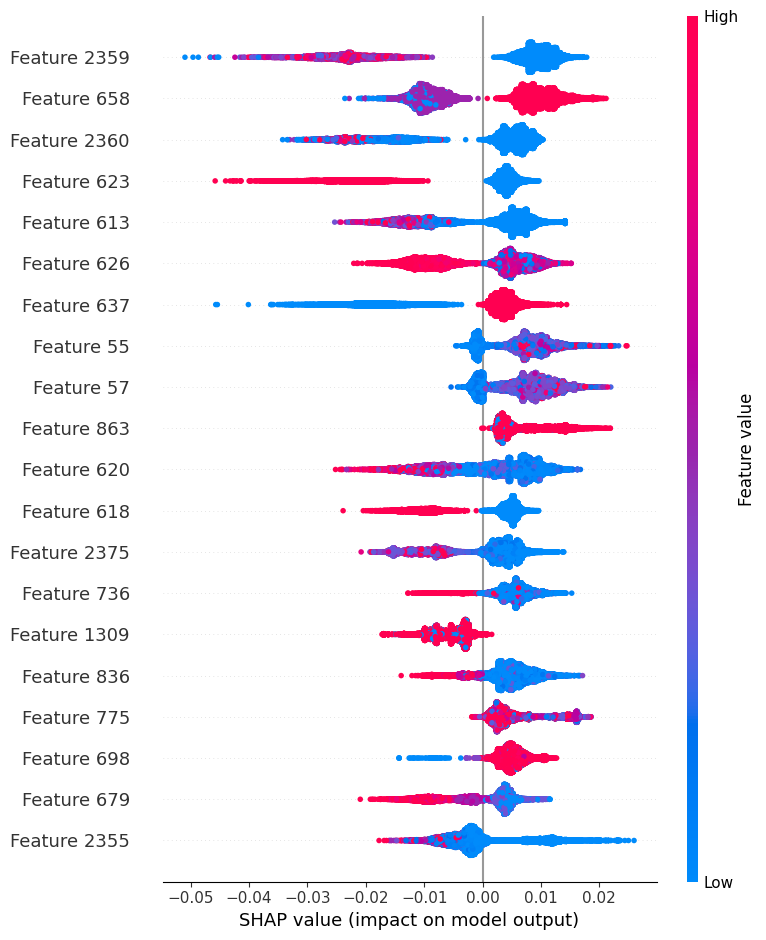

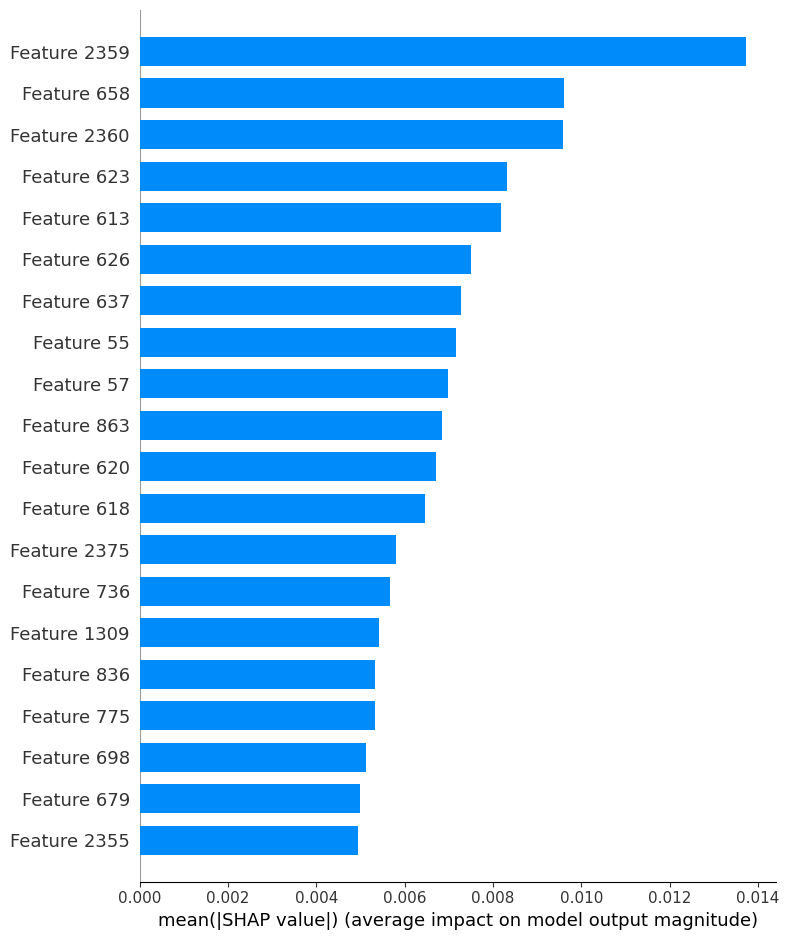

In [22]:
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="dot")  # Class 1
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

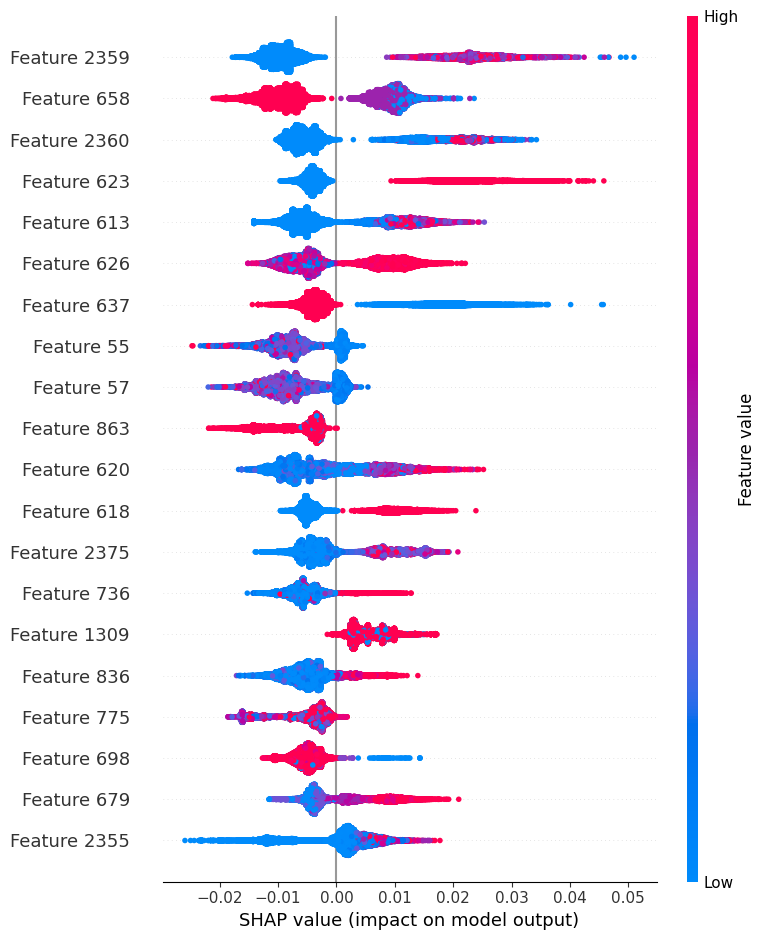

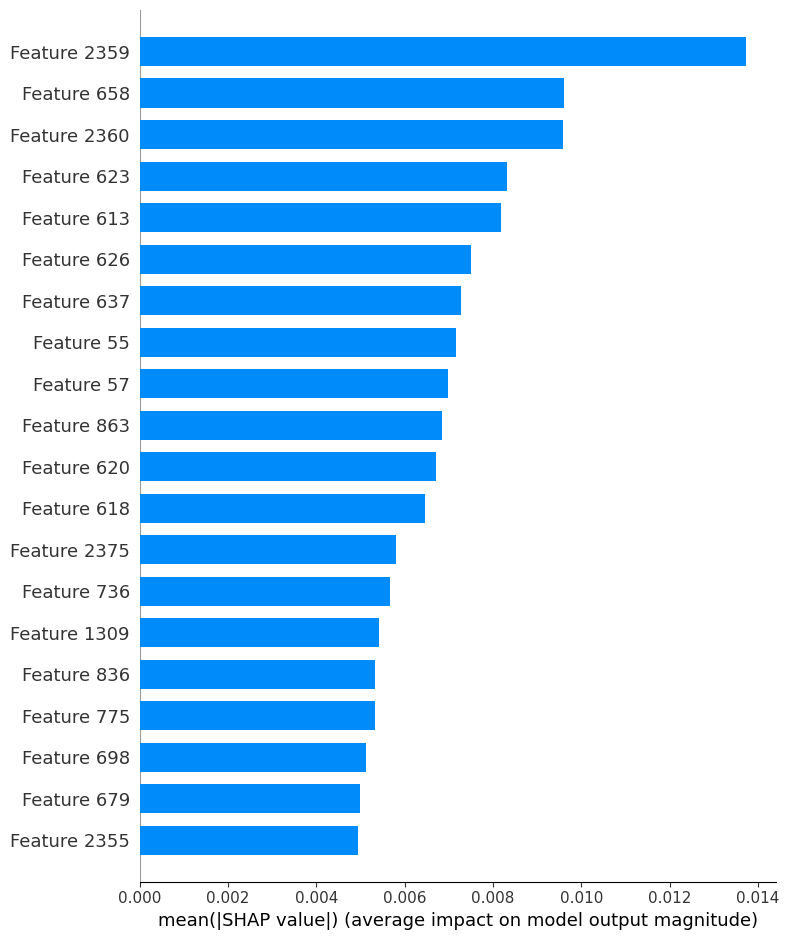

In [23]:
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type="dot")  # Class 1
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type="bar")